# Unsupervising Learning Capstone: Shopper Segments


## Reach Question: 

### A company wants to segment its shoppers

## Dataset: Online Shoppers Purchasing Intention [Source](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

In [64]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import normalize

from sklearn import metrics
from sklearn import ensemble

from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth,SpectralClustering
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn import preprocessing


%matplotlib inline

#Setting colors for visualizations
palette = 'pastel'
palette2 = 'muted'

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Exploration

|           DATA             |               |
|----------------------------|---------------|
| Number of Instances        | 12330         |
| Number of Attributes:      | 18            |
| Attribute Characteristics: | Integer, Real |

### Types of variables


In [3]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Description of columns

- Administrative, Informational, ProductRelated: Represent the number of different types of pages visited by the visitor in that session

- Administrative_Duration, Informational_Duration, ProductRelated_Duration: Represents the total time spent in each of  page categories (mentioned above)

- BounceRates: Refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session

- ExitRates: is the percentage of exits on a page

- PageValues: represent the metrics measured by "Google Analytics" for each page in the e-commerce site

- SpecialDay: indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction

- VisitorType: There two, "New visitor" and "Returning Visitor"

- Weekend: It's a Boolean value indicating whether the date of the visit is weekend

- Month, OperatingSystems, Browser, Region and TrafficType


2    10551
1     1779
Name: VisitorType, dtype: int64


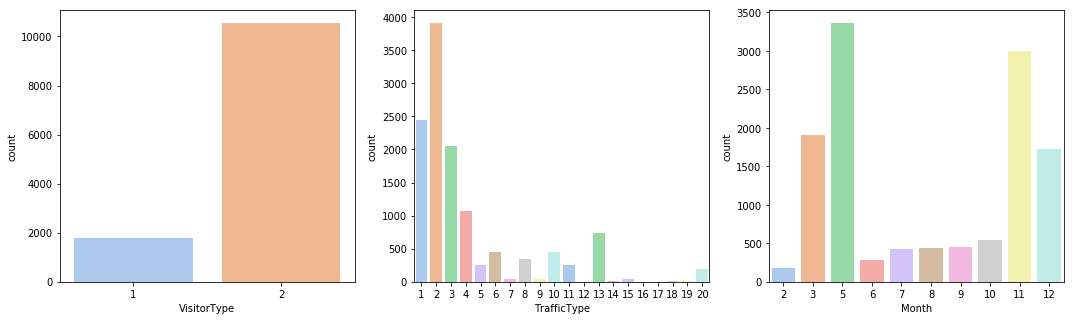

In [57]:
# Visualization for categorical variables


print(df.VisitorType.value_counts())

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x=df['VisitorType'], palette = palette, data=df)

plt.subplot(1,3,2)
sns.countplot(df['TrafficType'], palette = palette)

plt.subplot(1,3,3)
sns.countplot(df['Month'], palette = palette)

plt.show()


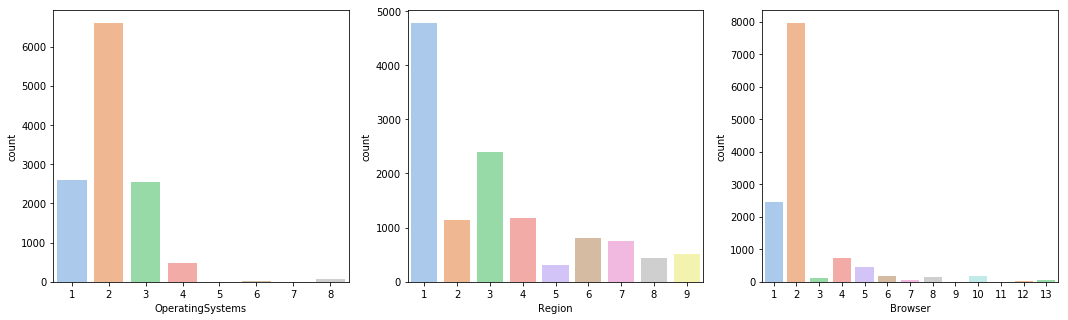

In [58]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x=df['OperatingSystems'], palette = palette, data=df)

plt.subplot(1,3,2)
sns.countplot(df['Region'], palette = palette,  data=df)

plt.subplot(1,3,3)
sns.countplot(df['Browser'], palette = palette,  data=df)


plt.show()

In [59]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Total_Duration,cluster_kmeans,cluster_kmeans2,c_agglomerative,DBSCAN
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,2.357097,3.147364,4.069586,1.855718,0.232603,1310.037228,0.079157,0.603569,0.304298,-0.677291
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,1.717277,2.401591,4.025169,0.351390,0.422509,2037.801702,0.269994,1.177087,0.750930,1.647325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,2.000000,1.000000,2.000000,2.000000,0.000000,222.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,2.000000,3.000000,2.000000,2.000000,0.000000,680.000000,0.000000,0.000000,0.000000,-1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,...,2.000000,4.000000,4.000000,2.000000,0.000000,1626.908333,0.000000,0.000000,0.000000,-1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,13.000000,9.000000,20.000000,2.000000,1.000000,69921.647230,1.000000,3.000000,3.000000,13.000000


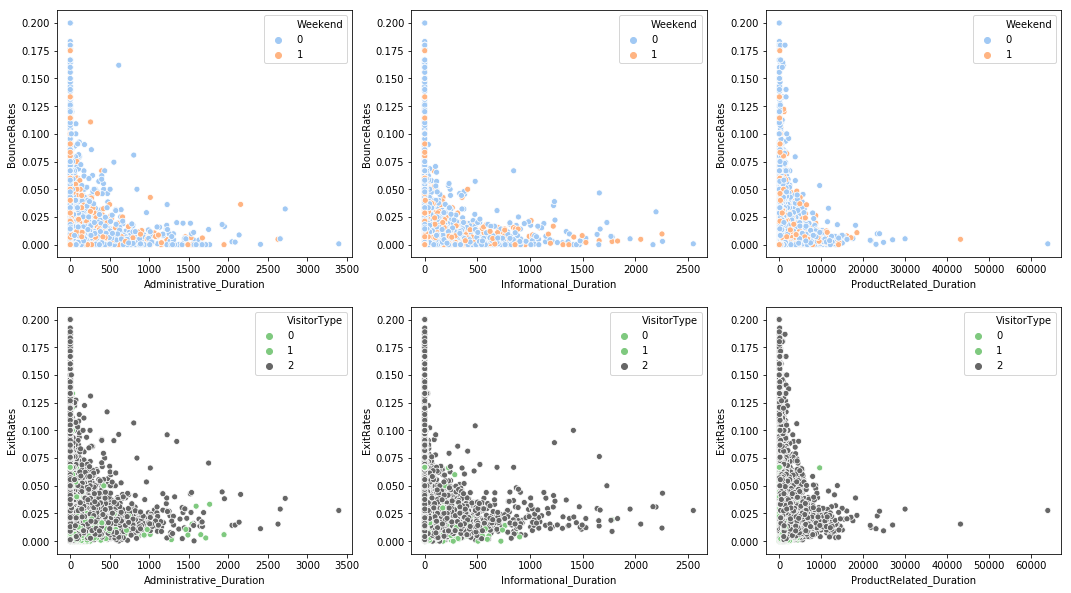

In [75]:
#Administrative, informational and Product duration vs Bounce and Exit Rates

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.scatterplot(x='Administrative_Duration',y='BounceRates',
                hue="Weekend",data=df, palette = palette)

plt.subplot(2,3,2)
sns.scatterplot(x='Informational_Duration', y='BounceRates',
                hue="Weekend",data=df, palette = palette)

plt.subplot(2,3,3)
sns.scatterplot(x='ProductRelated_Duration', y='BounceRates',
                hue="Weekend", data=df, palette = palette)

plt.subplot(2,3,4)
sns.scatterplot(x='Administrative_Duration', y='ExitRates',
                hue="VisitorType", data=df, palette = 'Accent')

plt.subplot(2,3,5)
sns.scatterplot(x='Informational_Duration', y='ExitRates',
                hue="VisitorType", data=df, palette = 'Accent')

plt.subplot(2,3,6)
sns.scatterplot(x='ProductRelated_Duration', y='ExitRates',
                hue="VisitorType", data=df, palette = 'Accent')

plt.show()

In [76]:
#Create a new variable with Total Duration browsing the website

df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

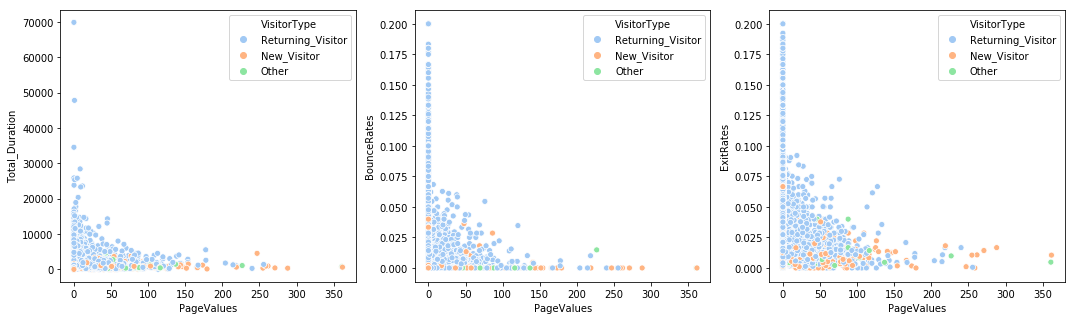

In [9]:
#Total_Duration,BounceRates, ExitRates vs PageValues
#Page Value is the average value for a page that a user visited 
#before landing on the goal page or completing an Ecommerce transaction (or both)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x='PageValues', y='Total_Duration',
                hue='VisitorType', data=df, palette = palette)

plt.subplot(1,3,2)
sns.scatterplot(x='PageValues', y='BounceRates',
                hue="VisitorType",data=df, palette = palette)

plt.subplot(1,3,3)
sns.scatterplot(x='PageValues', y='ExitRates',
                hue="VisitorType", data=df, palette = palette)

plt.show()

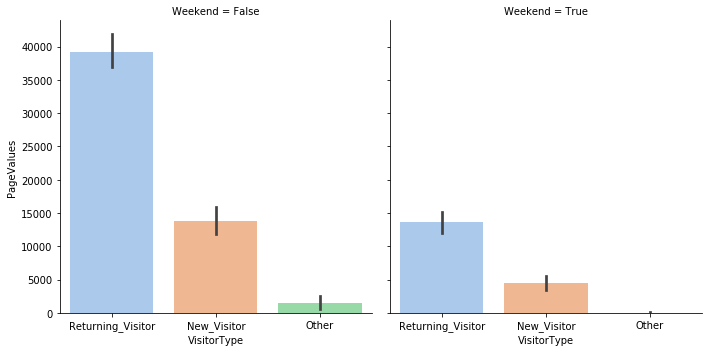

In [10]:
sns.catplot(x='VisitorType', y='PageValues',  kind="bar", 
            data=df, palette = palette, estimator=sum, col="Weekend")


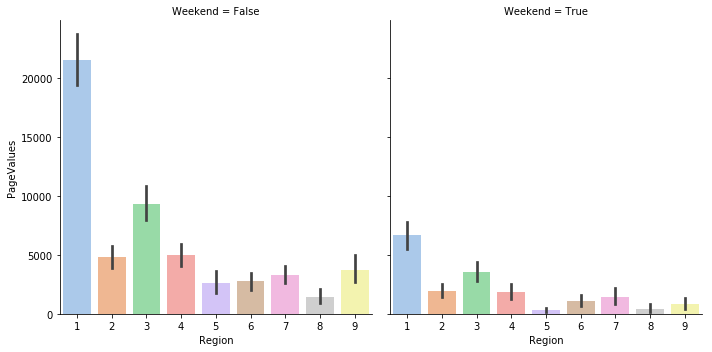

In [11]:
sns.catplot(x='Region', y='PageValues',  kind="bar", 
            data=df, palette = palette, estimator=sum, col="Weekend")


## Data Cleaning

Null values are in yellow


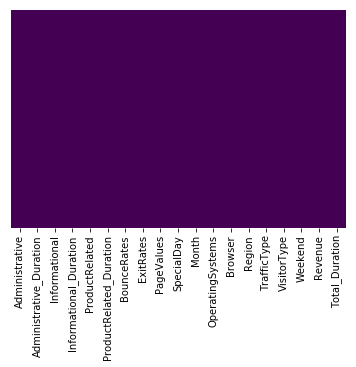

In [12]:
#Look for null values

print('Null values are in yellow')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
#Functions to convert categorical to numeric variables

def Converterm(val):
    
    months = {'Jan':1,'Feb':2,'Mar':3,
              'Apr':4,'May':5,'June':6,
              'Jul':7,'Aug':8,'Sep':9,
              'Oct':10,'Nov':11,'Dec':12}
    
    return months[val] if val in months else 0
    

def ConverterVisitor(val):

    #Based on dataset description, it should be just two visitor type
    visitor = {'New_Visitor':1,'Returning_Visitor':2}    
    return 1 if val not in visitor else visitor[val] 
        

def ConverterBoolean(val):
    
    return 1 if val else 0



In [78]:
#Convert string to numeric values    

df['VisitorType'] = df['VisitorType'].apply(ConverterVisitor)
df['Month'] = df['Month'].apply(Converterm)
df['Weekend'] = df['Weekend'].apply(ConverterBoolean)

### Feature Selection

In [15]:
selectedFeatures = [ 'ProductRelated','Total_Duration',
                    'ProductRelated_Duration', 'BounceRates', 
                    'PageValues', 'Month', 'VisitorType']

## Clustering Models

### Approach 1 : K-Means Model 

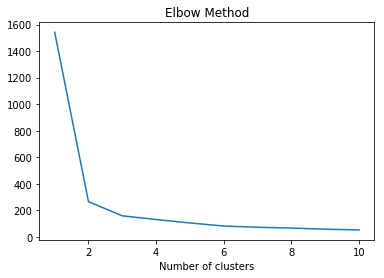

In [16]:
#Elbow method to confirm number of clusters

X = np.array(df[selectedFeatures])
X_normalized = preprocessing.normalize(X)

wcss = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [17]:
#KMeans Algorithm

X = np.array(df[selectedFeatures])

# kmeans Model with 2 clusters because elbow methog
kmeans = KMeans(n_clusters=2, random_state=42, n_jobs=2)
y_kmeans = kmeans.fit_predict(X)

df['cluster_kmeans'] = y_kmeans

#For metrics purpose
algorithms = {}
algorithms['kmeans_1'] = kmeans



In [27]:
from sklearn.decomposition import PCA

# Normalize the data.
X_norm = normalize(X)
# Reduce it to two components for visualization purpose
X_pca = PCA(2).fit_transform(X_norm)


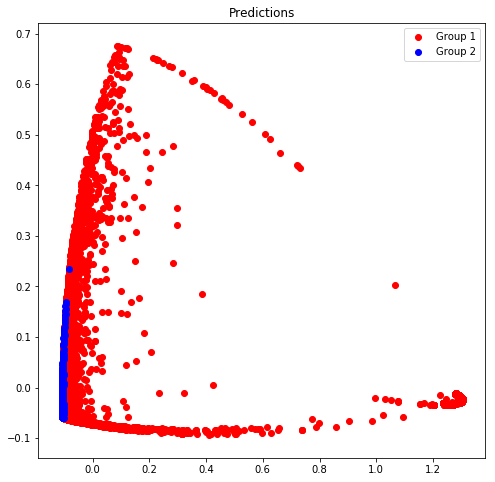

In [28]:
plt.figure(figsize=(8,8))

plt.title('Predictions')
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], 
            c='red', label = 'Group 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], 
            c='blue', label = 'Group 2')
plt.legend()
plt.show()

### Approach 2 : K-Means Model with 4 clusters

In [30]:
#KMeans Algorithm

X = np.array(df[selectedFeatures])

# kmeans Model
kmeans2 = KMeans(n_clusters=4, random_state=42, n_jobs=10)
y_kmeans2 = kmeans2.fit_predict(X)

df['cluster_kmeans2'] = y_kmeans2

#For metrics purpose
algorithms['kmeans_2'] = kmeans2



In [31]:
from sklearn.decomposition import PCA
# Normalize the data.
X_norm = normalize(X)
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)



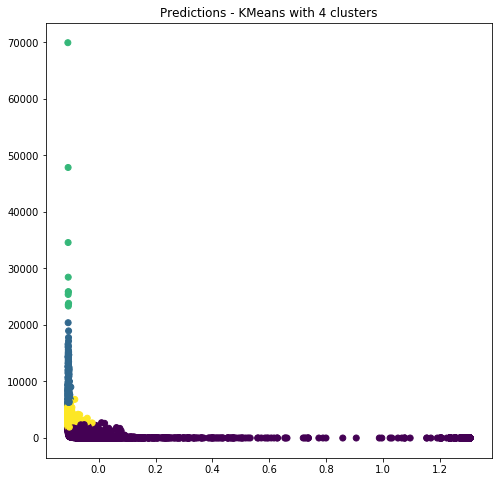

In [33]:
plt.figure(figsize=(8,8))
plt.title('Predictions - KMeans with 4 clusters')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_kmeans2)
plt.show()

### Approach 3: Agglomerative Algorithm

In [42]:
#Agglomerative Algorithm

#Set X
X = np.array(df[selectedFeatures])

agglomerativeC = AgglomerativeClustering(linkage="ward", 
                                         affinity='euclidean',n_clusters=4, 
                                         compute_full_tree='auto')

y_agglomerative = agglomerativeC.fit_predict(X)

df['c_agglomerative'] = y_agglomerative
algorithms['agglomerative'] = agglomerativeC


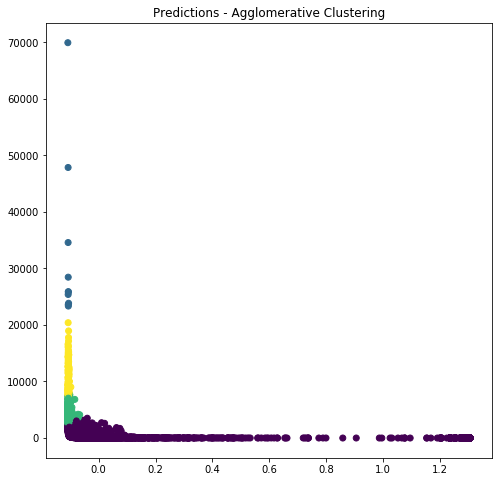

In [43]:
plt.figure(figsize=(8,8))
plt.title('Predictions - Agglomerative Clustering')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_agglomerative)
plt.show()

### Approach 4: DBSCAN Algorithm

In [46]:
# DBSCAN Algorithm
X = np.array(df[selectedFeatures])

dbscan = DBSCAN(eps=0.3, min_samples=10)
y_DBSCAN = dbscan.fit_predict(X)
df['DBSCAN'] = y_DBSCAN

# For metrics purpose
algorithms['DBSCAN'] = dbscan

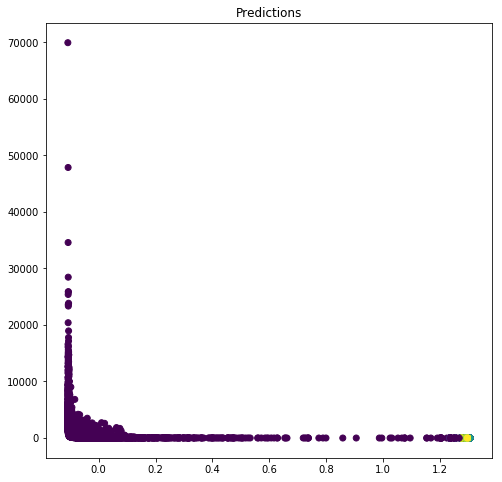

In [47]:
plt.figure(figsize=(8,8))
plt.title('Predictions')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_DBSCAN)
plt.show()

### Metrics

#### Adjusted Rand Score (ARS):

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters.

#### Normalized Mutual Information (NMI)

Mutual Information of two random variables is a measure of the mutual dependence between the two variables.



#### Average Score

The sum of the two scores (ARS + NMI) divided 2

In [50]:
# Fit all models
results = []

for model in algorithms.values():
    model.fit(np.array(df[selectedFeatures]))
    results.append(list(model.labels_))
    

In [51]:
nmi_results = []
ars_results = []
y_true_val = list(y)

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred, average_method='arithmetic'))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))
                  

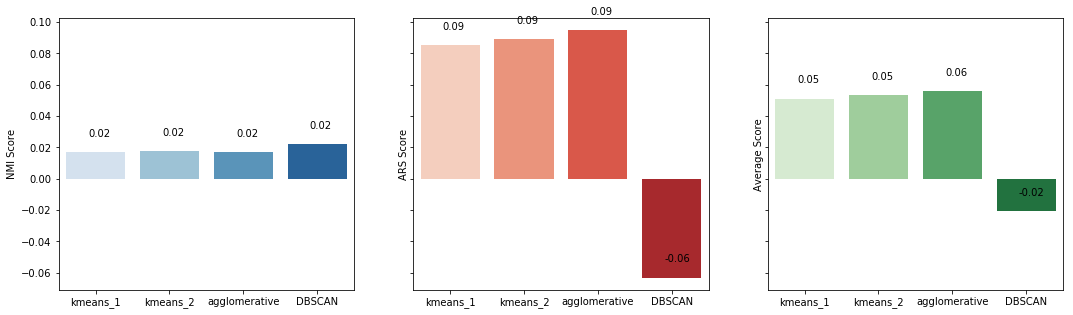

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))

numberModels = 4

x = np.arange(numberModels)
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = list(algorithms.keys())

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

# Add ylabels
ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.show()

--------------------

By: Wendy Navarrete

October 2019